# 6.8.1 Easy: Make predictions on the simulated ARMA(1,1) process  

1. Reusing the simulated ARMA(1,1) process, split it into a training and test set. Assign 80% of the data to the training set, and the remaining 20% to the test set.
2. Use the recursive_forecast function to make predictions using the ARMA(1,1) model, the mean method, and the last know value method.
3. Plot your forecasts.
4. Evaluate each method’s performance using the MSE. Which method performed best?

In [33]:
# Simulate an ARMA(1,1) process and split it into a training and test set.

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# omd
import importlib
import sys

sys.path.append('../../My-Code/')

import timetools as tt

importlib.reload(tt)

<module 'timetools' from '../../My-Code/timetools.py'>

In [34]:
# 1. Reusing the simulated ARMA(1,1) process, split it into a training and test set. 
# Assign 80% of the data to the training set, and the remaining 20% to the test set.
np.random.seed(42)

ar1 = np.array([1, -0.33])
ma1 = np.array([1,0.25])

AR_1_1 = pd.DataFrame(ArmaProcess(ar1, ma1).generate_sample(nsample=1000), columns=['value'])
train, test = AR_1_1[0:-int(0.2*len(AR_1_1))], AR_1_1[-int(0.2*len(AR_1_1)):]

Test Statistic                -1.770094e+01
p-value                        3.537180e-30
#Lags Used                     1.000000e+00
Number of Observations Used    9.980000e+02
Critical Value (1%)           -3.436919e+00
Critical Value (5%)           -2.864440e+00
Critical Value (10%)          -2.568314e+00
dtype: float64

The time series is stationary.


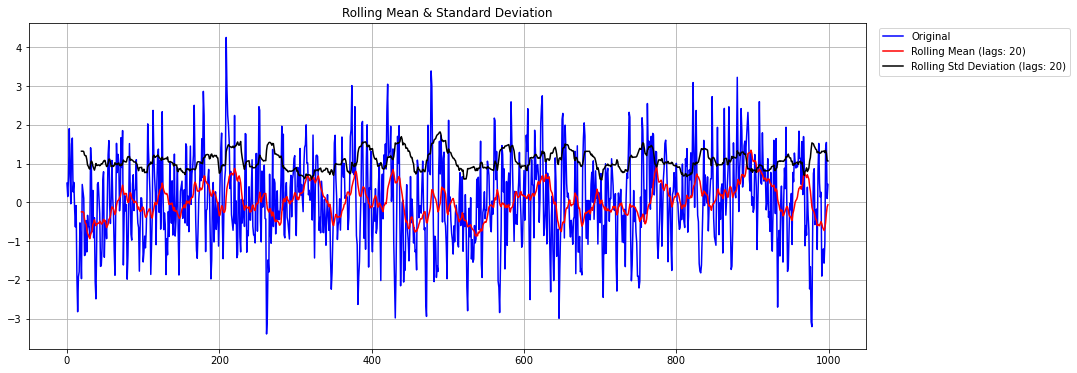

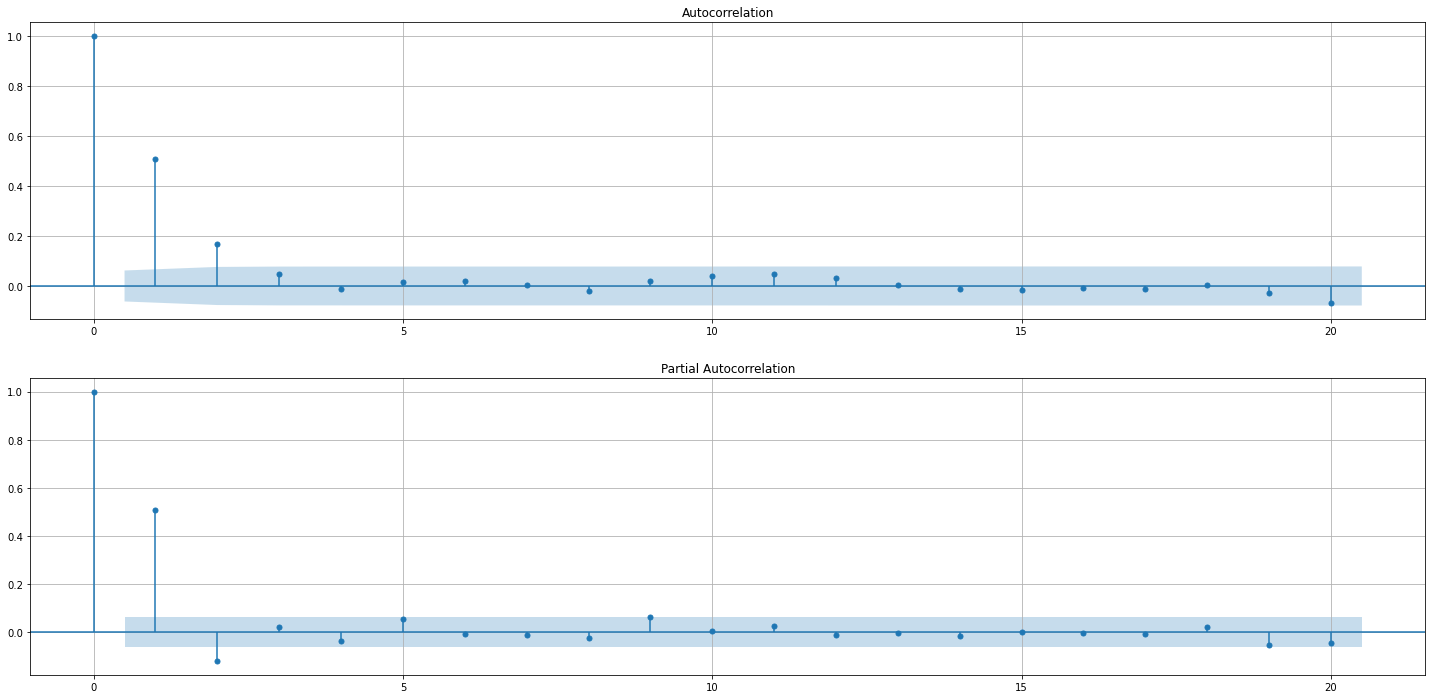

In [35]:
tt.adf(AR_1_1)
tt.plot_for_stationary(AR_1_1)
tt.plot_acf_pcf(AR_1_1, num_lag=20)

In [36]:
# 2. Use the recursive_forecast function to make predictions using the ARMA(1,1) model, the mean method, and the last know value method.

pred_df = test.copy()

pred_mean = tt.recursive_forecast(AR_1_1, len(train), len(test), window=1, method='mean', order=(1,0,1))
pred_last = tt.recursive_forecast(AR_1_1, len(train), len(test), window=1, method='last', order=(1,0,1))
pred_arma = tt.recursive_forecast(AR_1_1, len(train), len(test), window=1, method='ARMA', order=(1,0,1))

pred_df['pred_mean'] = pred_mean
pred_df['pred_last_value'] = pred_last
pred_df['pred_ARMA'] = pred_arma

pred_df.head()

,value,pred_mean,pred_last_value,pred_ARMA
800,1.007098,-0.014863,0.185986,0.066423
801,0.050869,-0.013587,1.007098,0.546437
802,-0.016104,-0.013507,0.050869,-0.106404
803,-0.443559,-0.013510,-0.016104,0.017223
804,-0.696440,-0.014045,-0.443559,-0.251763


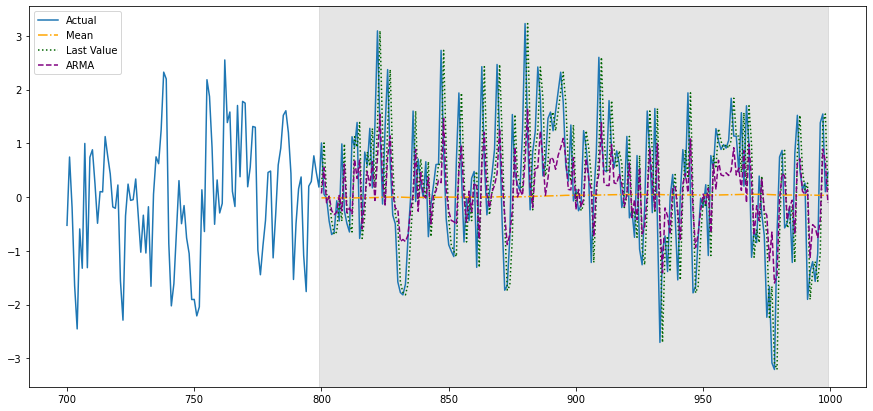

In [37]:
# 3. Plot your forecasts.

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(AR_1_1[700:], label='Actual')
ax.plot(pred_df['pred_mean'], label='Mean', color='orange', ls='dashdot')
ax.plot(pred_df['pred_last_value'], label='Last Value', color='darkgreen', ls='dotted')
ax.plot(pred_df['pred_ARMA'], label='ARMA', color='purple', ls='--')
ax.axvspan(xmin=train[-1:].index.values[0], xmax=test[-1:].index.values[0], color='#808080', alpha=0.2)
plt.legend()
plt.show()

In [38]:
# 4. Evaluate each method’s performance using the MSE. Which method performed best?

mse_mean = mean_squared_error(pred_df['value'], pred_df.pred_mean)
mse_last = mean_squared_error(pred_df['value'], pred_df.pred_last_value)
mse_ARMA = mean_squared_error(pred_df['value'], pred_df.pred_ARMA)

Text(2, 1.0292139927855375, '0.93')

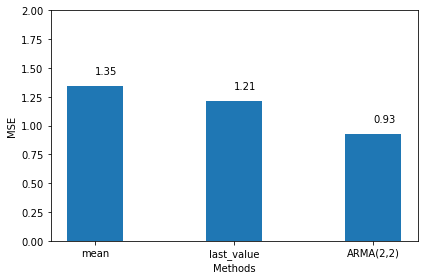

In [39]:
fig, ax = plt.subplots()

ax.bar(
    ['mean', 'last_value', 'ARMA(2,2)'], 
    [mse_mean, mse_last, mse_ARMA], 
    width=0.4)

ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 2)

plt.tight_layout()
ax.text(y=mse_mean+0.1, x=0, s=round(mse_mean, 2))
ax.text(y=mse_last+0.1, x=1, s=round(mse_last, 2))
ax.text(y=mse_ARMA+0.1, x=2, s=round(mse_ARMA, 2))